In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

## Буду обучать на фотографиях, с которых я удалил фон

In [9]:
base_path = './dataset-resized_back'
test_path = './MyRubbish_back'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))


## Посмотрим на размер нашего датасета, а так же на несколько фотографий

In [7]:
print(len(img_list))

2517


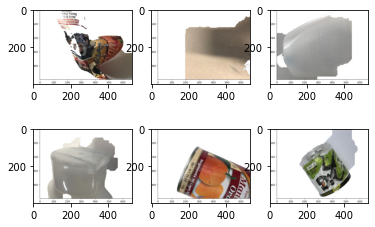

In [3]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

## Возьмём свои фотографии и удалим у них фон с помощью вспомогательной программы

In [6]:

from DeleteFON import DelFon
path_image = 'MyRubbish/'
new_path = 'MyRubbish_back/Rubbish_back/'
tree = os.walk(path_image)
for i in tree:
    S = i[2]
    break
for i in S:
    DelFon(str(i), path_image, new_path)

## Подготовим данные для обучения

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./225, shear_range=0.1, zoom_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, validation_split=0.1)

test_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.9999)
    
train_generator = train_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='training', seed=0)

validation_generator = test_datagen.flow_from_directory(
    test_path, target_size=(300, 300), batch_size=16,
    subset='validation', class_mode='categorical',  seed=0)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

labels1 = (validation_generator.class_indices)
labels1 = dict((v,k) for k,v in labels1.items())


Found 2268 images belonging to 6 classes.
Found 16 images belonging to 6 classes.


{0: 'Rubbish_back',
 1: 'Rubbish_back1',
 2: 'Rubbish_back2',
 3: 'Rubbish_back3',
 4: 'Rubbish_back4',
 5: 'Rubbish_back5'}

## Составим модель и обучим её 

In [12]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
model.fit_generator(train_generator, epochs=10, steps_per_epoch=2276//32,validation_data=validation_generator,
                    validation_steps=251//32)

Epoch 1/10
71/71 [==============================] - 43s 609ms/step - loss: 1.3755 - acc: 0.4393 - val_loss: 1.6303 - val_acc: 0.4375
Epoch 2/10
71/71 [==============================] - 43s 605ms/step - loss: 1.3786 - acc: 0.4373
Epoch 3/10
71/71 [==============================] - 44s 622ms/step - loss: 1.3683 - acc: 0.4602
Epoch 4/10
71/71 [==============================] - 43s 609ms/step - loss: 1.3461 - acc: 0.4867
Epoch 5/10
71/71 [==============================] - 43s 605ms/step - loss: 1.2725 - acc: 0.5035
Epoch 6/10
71/71 [==============================] - 43s 608ms/step - loss: 1.3216 - acc: 0.4903
Epoch 7/10
71/71 [==============================] - 43s 607ms/step - loss: 1.2840 - acc: 0.5026
Epoch 8/10
71/71 [==============================] - 43s 599ms/step - loss: 1.3201 - acc: 0.4779
Epoch 9/10
71/71 [==============================] - 43s 610ms/step - loss: 1.2853 - acc: 0.4920
Epoch 10/10
71/71 [==============================] - 43s 605ms/step - loss: 1.2411 - acc: 0.5106


## Так как это достаточно долгий процесс, то сохраним нашу модель, чтобы впредь не возвращаться к обучению

In [19]:
model.save('my_model3.h5')